## Analysis of Buffer's Slack Data

This is a quick analysis of Buffer's Slack data. The goal is to look at how similar team mates are based on which channels they frequent

**Method**

I used an algorithm called PCA (Principal Component Analysis) to represent all the number of messages you send in each channel in two dimensions (and that’s how I can plot it on a graph). I then used an algorithm called K-Means clustering for finding clusters of users that are similar. 

All of the data analysis and plotting code is contained in the `slack_channels.analysis` package

### The data

The data was collected by exporting an archive of our Slack data and unziping it to the `data/raw` directory. From there it can be processed by running the `process_data.py` script

In [ ]:
#!python process_data.py

### Install some dependencies, load the `analysis` package

In [54]:
%%bash
pip install seaborn
pip install adjustText

  Running setup.py bdist_wheel for adjustText: started
  Running setup.py bdist_wheel for adjustText: finished with status 'done'
  Stored in directory: /home/local/.cache/pip/wheels/0a/70/31/c41e8cd4e9983778b0c570def9cfe1b904bb77b24b2144f54e
Successfully built adjustText


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [77]:
from slack_channels import analysis

### Run the analysis

In [80]:
results = analysis.run(number_of_clusters=9)
results.cluster_predictions.sample(10)

,cluster,name
49,7,mark
2,4,alfred
34,1,jenny
53,3,michael
42,2,juliet
38,7,jordan
48,7,marcus
15,5,daniel
65,7,ruth
43,2,karinna


### Plot the results

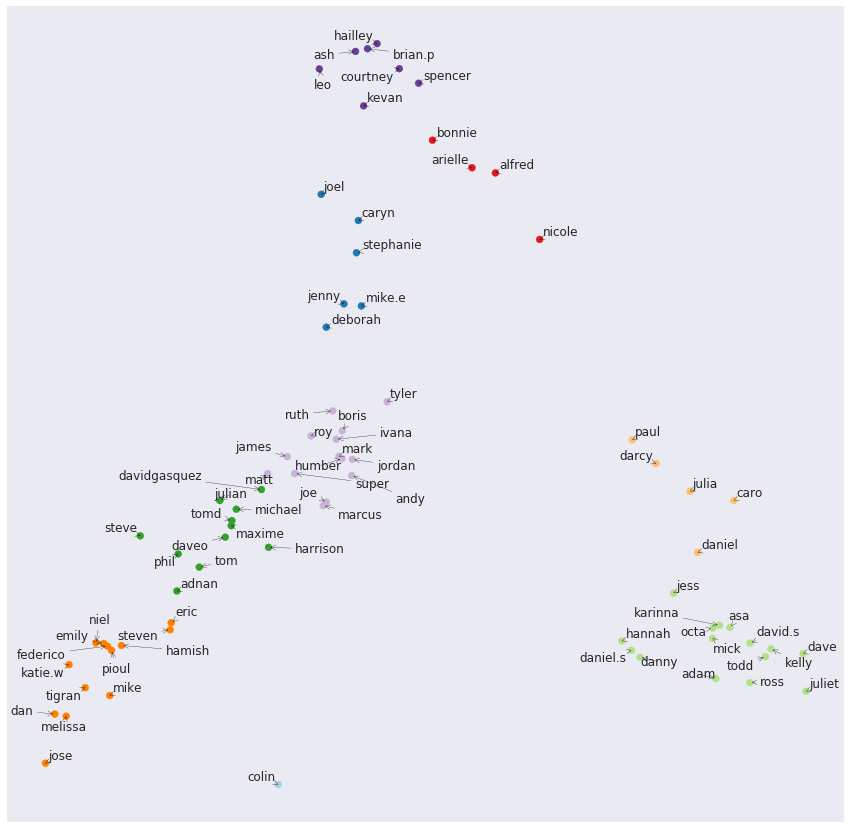

In [81]:
results.plot_clusters()

### We can also see how similar any two channels are, based on user message counts

In [41]:
results.channel_similarity('data', 'data-requests')

0.66509677427522451

In [42]:
results.channel_similarity('data', '_general')

0.082768737823465388

In [82]:
results.channel_similarity('marketing', 'prod-growth')

0.033495451193413683

In [83]:
results.channel_similarity('marketing', 'data')

0.012310684324250643